In [1]:
import pandas as pd
import numpy as np
import statistics as stat

In [2]:
dollars = pd.read_csv("/content/drive/My Drive/project/dataset/preprocessed/usd_prices/usd_prices_eda.csv") # TBD

In [3]:
print(dollars.columns)

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'max',
       'open', 'close'],
      dtype='object')


In [4]:
dollars['min'] = 1/dollars['min']
dollars['max'] = 1/dollars['max']
dollars['open'] = 1/dollars['open']
dollars['close'] = 1/dollars['close']

In [5]:
dollars

,year,month,day,hour,minute,second,min,max,open,close
0,2018,1,1,17,0,0,0.833076,0.832639,0.833076,0.832639
1,2018,1,1,17,1,0,0.833215,0.832674,0.832757,0.833125
2,2018,1,1,17,2,0,0.833090,0.833035,0.833090,0.833035
3,2018,1,1,17,3,0,0.833118,0.832986,0.833049,0.833014
4,2018,1,1,17,4,0,0.833014,0.832993,0.832993,0.833000
...,...,...,...,...,...,...,...,...,...,...
1377964,2020,7,1,0,54,0,0.890726,0.890678,0.890686,0.890726
1377965,2020,7,1,0,55,0,0.890758,0.890694,0.890726,0.890726
1377966,2020,7,1,0,56,0,0.890853,0.890718,0.890726,0.890813
1377967,2020,7,1,0,57,0,0.891099,0.890805,0.890813,0.891051


In [6]:
print("MEAN MAX VALUE:", stat.mean(dollars['max'])) # avg
print("MODE MAX VALUE:", stat.mode(dollars['max'])) # value that appears most frequently is mode
print("MEDIAN MAX VALUE:", stat.median(dollars['max'])) # median, or the value in the middle when every all values are sorted
print("MAX MAX VALUE:", max(dollars['max']))

MEAN MAX VALUE: 0.8791372008330928
MODE MAX VALUE: 0.8922676089012617
MEDIAN MAX VALUE: 0.8824567596187787
MAX MAX VALUE: 0.9665944942777607


In [7]:
print("MEAN MIN VALUE:", stat.mean(dollars['min'])) # avg
print("MODE MIN VALUE:", stat.mode(dollars['min'])) # value that appears most frequently is mode
print("MEDIAN MIN VALUE:", stat.median(dollars['min'])) # median, or the value in the middle when every all values are sorted
print("MIN MIN VALUE:", min(dollars['min']))

MEAN MIN VALUE: 0.8792535677848696
MODE MIN VALUE: 0.892355193061046
MEDIAN MIN VALUE: 0.8825735845726138
MIN MIN VALUE: 0.7966413600261297


In [8]:
import matplotlib.pyplot as plt

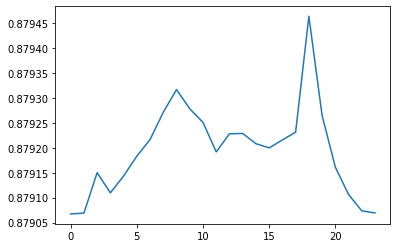

In [9]:
dollar_price_per_hour = [0 for i in range(0, 24)]
number_of_dollar_prices_per_hour = [0 for i in range(0, 24)]

for d in dollars.values:
  hour = int(d[3])
  open_price = d[8]
  close_price = d[9]
  dollar_price_per_hour[hour] += (open_price + close_price) / 2
  number_of_dollar_prices_per_hour[hour] += 1

average_dollar_price_per_hour = [dollar_price_per_hour[i] / number_of_dollar_prices_per_hour[i] for i in range(0, 24)]
plt.plot(average_dollar_price_per_hour)

In [49]:
for d in dollars.values:
  year = int(d[0])
  month = int(d[1])
  day = int(d[2])

  if year == 2020 and month == 8 and day == 1:
    print("SUBOTA")
  

[274326, 275103, 275679, 277521, 204024, 0, 71316]


<BarContainer object of 5 artists>

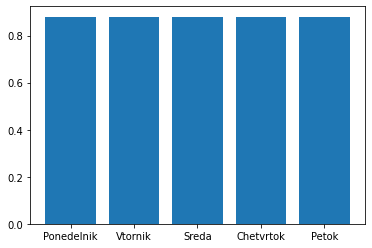

In [52]:
# koj den kolko tvituva (vo procenti)
import datetime

dollar_price_in_day = [0 for _ in range(0, 7)]
number_of_dollar_prices_in_day = [0 for _ in range(0, 7)]

# print(dollars.columns)

# today = datetime.datetime.today().weekday()
# print(today)

# ichera = datetime.datetime(2020, 10, 17).weekday()
# print(ichera)


for d in dollars.values:
  year = int(d[0])
  month = int(d[1])
  day = int(d[2])


  datum = datetime.datetime(year, month, day)
  if datum.weekday() == 5:
    print(datum)
    break

  open_price = d[8]
  close_price = d[9]
  dollar_price_in_day[datum.weekday()] += (open_price + close_price) / 2
  number_of_dollar_prices_in_day[datum.weekday()] += 1

print(number_of_dollar_prices_in_day)

dollar_price_in_day = [round(dollar_price_in_day[i] / number_of_dollar_prices_in_day[i], 2) for i in range(0, 5)]

plt.bar(["Ponedelnik", "Vtornik", "Sreda", "Chetvrtok", "Petok"], dollar_price_in_day)

{'boxes': [<matplotlib.lines.Line2D at 0x7f85bbdaacf8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f85bbda3748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f85bbd94208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f85bbda3e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f85bbda3048>,
  <matplotlib.lines.Line2D at 0x7f85bbda33c8>]}

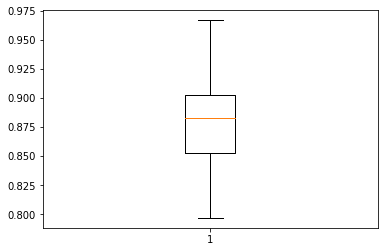

In [10]:
plt.boxplot(((dollars['open'] + dollars['close']) / 2))

([<matplotlib.axis.XTick at 0x7f85bbd42eb8>,
 [Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020')])

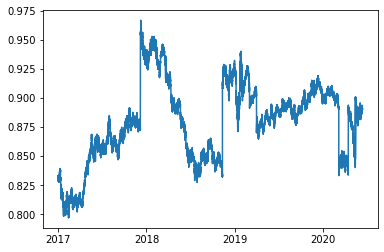

In [11]:
plt.plot(((dollars['open'] + dollars['close'])/2))
plt.xticks(np.arange(0, 1.4*1e6, step=0.4*1e6), ["2017", "2018", "2019", "2020"])

In [12]:
tweets = pd.read_csv('/content/drive/My Drive/project/dataset/preprocessed/tweets/dataset_eda.csv')

In [13]:
# Find most favourited tweet
row_index_of_most_favorited_tweet = np.argmax(tweets['favorites'].values)
most_favorited_tweet = tweets.iloc[row_index_of_most_favorited_tweet]
most_favorited_tweet['text']

'A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!'

{'boxes': [<matplotlib.lines.Line2D at 0x7f85bbb58908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f85bbb64358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f85bbb64dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f85bbb64a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f85bbb58c18>,
  <matplotlib.lines.Line2D at 0x7f85bbb58f98>]}

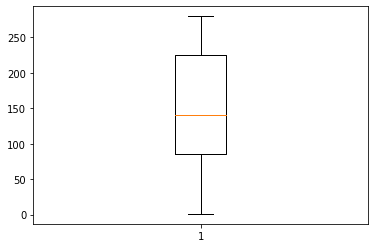

In [14]:
# length of tweets boxplot
plt.boxplot([len(x) for x in tweets['text']])

<BarContainer object of 24 artists>

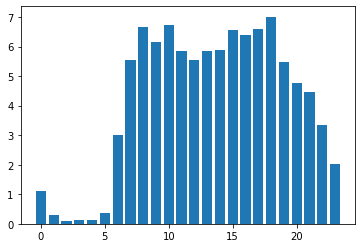

In [15]:
# hourly percent of tweets per day
tweets_in_hour = [0 for i in range(0, 24)]
tweets_total = tweets.shape[0]

for hour in tweets['hour']:
  tweets_in_hour[hour] += 1

tweets_in_hour_percentage = [round(i*100/tweets_total, 2) for i in tweets_in_hour]

plt.bar([i for i in range(0, 24)], tweets_in_hour_percentage)

6


<BarContainer object of 7 artists>

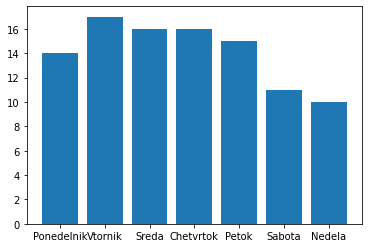

In [16]:
# koj den kolko tvituva (vo procenti)
import datetime

print(datetime.datetime.today().weekday())

tweets.iloc[[-1]]
# 04-09-2016 e nedela 

tweets_in_day = [0 for _ in range(0, 7)]

for tweet in tweets.values:
  year = tweet[2]
  month = tweet[3]
  day = tweet[4]

  datum = datetime.datetime(year, month, day)

  tweets_in_day[datum.weekday()] += 1

tweets_in_day = [round(i * 100 / len(tweets.values)) for i in tweets_in_day]

plt.bar(["Ponedelnik", "Vtornik", "Sreda", "Chetvrtok", "Petok", "Sabota", "Nedela"], tweets_in_day)

In [17]:
# most used word
  
def one_word_freq_finder(tweets):
  import re
  import nltk
  from nltk.corpus import stopwords
  nltk.download('stopwords')
  english_stopwords = set(stopwords.words('english'))
  
  one_word_freq = dict()

  for t in tweets['text']:
    res = re.findall(r'\w+', t) 
    for word in res:
      word = str.lower(word)
      if word not in one_word_freq:
        one_word_freq[word] = 1
      elif word not in english_stopwords:
        one_word_freq[word] += 1

  sorted_one_word_freq = {key: value for key, value in sorted(one_word_freq.items(), key = lambda ele : ele[1], reverse=True)}
  print(sorted_one_word_freq)

one_word_freq_finder(tweets)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'president': 5759, 'great': 3502, 'trump': 3199, 'people': 2156, 'american': 2132, 'america': 1891, 'today': 1830, 'thank': 1534, 'country': 1517, 'new': 1439, 'democrats': 1319, 'news': 1315, 'u': 1250, 'house': 1153, 'border': 1139, 'time': 1133, 'states': 1118, 'many': 1067, 'big': 1067, 'first': 1056, 'united': 1049, 'one': 1049, 'get': 1046, 'americans': 1001, 'fake': 995, 'never': 985, 'would': 965, 'years': 943, 'live': 877, 'day': 868, 'jobs': 830, 'back': 822, 'white': 815, 'national': 812, 'state': 811, 'make': 798, 'want': 788, 'world': 787, 'job': 756, 'much': 752, 'good': 748, 'even': 739, 'like': 700, 'must': 699, 'year': 699, 'going': 697, 'economy': 689, 'media': 687, 'tax': 683, 'watch': 680, 'administration': 668, 'done': 664, 'china': 655, 'military': 651, 'us': 646, 'made': 645, 'last': 643, 'trade': 639, 'security': 628, 'nation': 622, 'read': 621, 'help'

In [18]:
# most used phrase with two words

def two_word_freq_finder(tweets):
  import re
  import nltk
  from nltk.corpus import stopwords
  nltk.download('stopwords')
  english_stopwords = set(stopwords.words('english'))

  two_word_freq = dict()

  for t in tweets['text']:
    res = re.findall(r'\w+', t)
    len_res = len(res)
    if len_res <= 1: 
      continue

    for i in range(1, len_res):
      word1 = str.lower(res[i-1])
      word2 = str.lower(res[i])
      if word1 in english_stopwords or word2 in english_stopwords:
        continue
      word = word1 + "-" + word2
      if word not in two_word_freq:
        two_word_freq[word] = 1
      else:
        two_word_freq[word] += 1

  sorted_two_word_freq = {key: value for key, value in sorted(two_word_freq.items(), key = lambda ele : ele[1], reverse=True)}

  print(list(sorted_two_word_freq.keys())[:50])

two_word_freq_finder(tweets)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['president-trump', 'united-states', 'white-house', 'fake-news', '1600-daily', 'watch-live', 'west-wing', 'witch-hunt', 'american-people', 'wing-reads', 'new-york', 'law-enforcement', 'america-great', 'tax-cuts', 'prime-minister', 'north-korea', 'make-america', 'news-media', 'border-security', 'total-endorsement', 'great-job', 'southern-border', 'last-night', 'great-state', 'trump-administration', 'first-lady', 'crooked-hillary', 'american-workers', 'radical-left', 'supreme-court', 'today-president', 'nancy-pelosi', 'republican-party', 'hillary-clinton', '00-p', 'great-honor', 'small-businesses', 'live-president', 'stock-market', 'delivers-remarks', 'national-security', 'federal-government', 'great-american', 'north-carolina', 'donald-j', 'j-trump', 'task-force', 'second-amendment', 'president-donald', 'executive-order']


In [19]:
# prosechen broj na tvitovi vo den

unique_tweeting_days = set()

for t in tweets.values:
  year = int(t[2])
  month = int(t[3])
  day = int(t[4])
  date_key = str(year) + "-" + str(month) + "-" + str(day)
  if date_key not in unique_tweeting_days:
    unique_tweeting_days.add(date_key)

tweeting_days_number = len(unique_tweeting_days)
print("Prosechen broj na tvitovi vo den: " + str(round(len(tweets) / tweeting_days_number, 2)))


Prosechen broj na tvitovi vo den: 16.15


<BarContainer object of 24 artists>

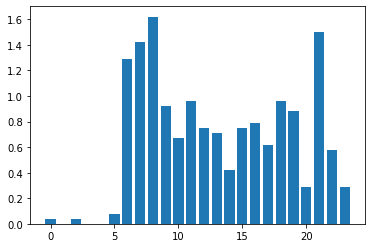

In [20]:
# hourly tweeting percentage when dollar price was highest
import copy

max_dollar_prices = copy.deepcopy(dollars)
max_dollar_prices = max_dollar_prices.sort_values(by=['max'], ascending=False)

# percent = 0.0001
percent_in_number = 50

days_with_max_dollar_prices = set()
tweets_in_days_with_max_dollar_prices = dict()
tweets_in_days_with_max_dollar_prices['text'] = list()
tweets_number_when_max_dollar_prices = 0
cnt = 0

for t in max_dollar_prices.values:
  year = int(t[0])
  month = int(t[1])
  day = int(t[2])
  date_key = str(year) + "-" + str(month) + "-" + str(day)
  
  if date_key not in days_with_max_dollar_prices:
    days_with_max_dollar_prices.add(date_key)
    cnt += 1

  if cnt >= percent_in_number:
    break

tweets_in_hour = [0 for i in range(0, 24)]
days_total = len(days_with_max_dollar_prices)

for t in tweets.values:
  year = int(t[2])
  month = int(t[3])
  day = int(t[4])
  date_key = str(year) + "-" + str(month) + "-" + str(day)
  if date_key in days_with_max_dollar_prices:
    tweets_number_when_max_dollar_prices += 1
    tweets_in_days_with_max_dollar_prices['text'].append(t[7])
    tweets_in_hour[int(t[5])] += 1  



tweets_in_hour_percentage = [round(i / 24, 2) for i in tweets_in_hour]

plt.bar([i for i in range(0, 24)], tweets_in_hour_percentage)



        year  month  day  hour  ...       min       max      open     close
47884   2018      2   15    23  ...  0.796641  0.796495  0.796635  0.796622
47893   2018      2   16     0  ...  0.796654  0.796533  0.796654  0.796553
47894   2018      2   16     0  ...  0.796660  0.796559  0.796559  0.796660
47904   2018      2   16     0  ...  0.796705  0.796673  0.796698  0.796686
47947   2018      2   16     0  ...  0.796711  0.796622  0.796622  0.796705
...      ...    ...  ...   ...  ...       ...       ...       ...       ...
374500  2017      1    3    10  ...  0.966053  0.965586  0.965596  0.965969
374504  2017      1    3    10  ...  0.966240  0.965614  0.966221  0.965614
374503  2017      1    3    10  ...  0.966725  0.966146  0.966632  0.966240
374501  2017      1    3    10  ...  0.967043  0.965969  0.965969  0.966791
374502  2017      1    3    10  ...  0.967062  0.966594  0.966716  0.966641

[1377969 rows x 10 columns]


<BarContainer object of 24 artists>

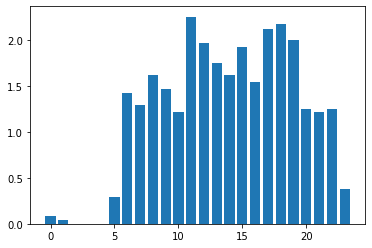

In [21]:

# hourly tweeting percentage when dollar price was lowest 
import copy

min_dollar_prices = copy.deepcopy(dollars)
min_dollar_prices = min_dollar_prices.sort_values(by=['min'], ascending=True)
print(min_dollar_prices)

# percent = 0.0001
percent_in_number = 50

days_with_min_dollar_prices = set()
tweets_in_days_with_min_dollar_prices = dict()
tweets_in_days_with_min_dollar_prices['text'] = list()
tweets_number_when_min_dollar_prices = 0
cnt = 0

for t in min_dollar_prices.values:
  year = int(t[0])
  month = int(t[1])
  day = int(t[2])
  date_key = str(year) + "-" + str(month) + "-" + str(day)
  
  if date_key not in days_with_min_dollar_prices:
    days_with_min_dollar_prices.add(date_key)
    cnt += 1

  if cnt >= percent_in_number:
    break

tweets_in_hour = [0 for i in range(0, 24)]
days_total = len(days_with_min_dollar_prices)


for t in tweets.values:
  year = int(t[2])
  month = int(t[3])
  day = int(t[4])
  date_key = str(year) + "-" + str(month) + "-" + str(day)
  if date_key in days_with_min_dollar_prices:
    tweets_number_when_min_dollar_prices += 1
    tweets_in_days_with_min_dollar_prices['text'].append(t[7]) # text na tweet
    tweets_in_hour[int(t[5])] += 1  


tweets_in_hour_percentage = [round(i / 24, 2) for i in tweets_in_hour]

plt.bar([i for i in range(0, 24)], tweets_in_hour_percentage)


In [22]:
# most used words when dollar price is low
one_word_freq_finder(tweets_in_days_with_min_dollar_prices)
two_word_freq_finder(tweets_in_days_with_min_dollar_prices)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'president': 233, 'trump': 220, 'great': 95, 'american': 88, 'america': 87, 'people': 75, 'today': 73, 'read': 73, 'tax': 61, 'country': 53, 'infrastructure': 53, 'americans': 48, 'first': 46, 'tonight': 45, 'u': 42, 'administration': 41, 'state': 40, 'new': 39, 'west': 37, 'house': 36, 'cuts': 36, 'daily': 36, 'would': 35, 'law': 35, '1600': 35, 'many': 35, 'need': 34, 'national': 33, 'year': 33, 'wing': 33, 'reads': 32, 'economic': 32, 'opioid': 32, 'time': 31, 'edition': 31, 'border': 30, 'thank': 30, 'states': 29, 'enforcement': 29, 'live': 29, 'jobs': 29, 'white': 29, 'one': 28, 'trade': 28, 'back': 28, 'must': 28, 'crisis': 28, 'world': 27, 'security': 27, 'never': 27, 'immigration': 27, 'news': 26, 'reform': 26, 'school': 26, 'watch': 26, 'russia': 26, 'nation': 26, 'day': 24, 'democrats': 24, 'secretary': 24, 'story': 24, 'good': 23, 'make': 23, 'working': 23,

In [23]:
# most used words when dollar price is high
one_word_freq_finder(tweets_in_days_with_max_dollar_prices)
two_word_freq_finder(tweets_in_days_with_max_dollar_prices)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'great': 70, 'trump': 35, 'media': 27, 'u': 27, 'new': 27, 'big': 26, 'fake': 25, 'america': 25, 'news': 25, 'american': 24, 'people': 24, 'thank': 23, 'jobs': 23, 'make': 20, 'congratulations': 18, 'russia': 18, 'time': 17, 'president': 17, 'going': 17, 'one': 16, 'must': 16, 'today': 15, 'healthcare': 15, 'join': 15, 'election': 14, 'country': 14, 'obamacare': 14, 'tax': 13, 'would': 12, 'many': 12, 'women': 12, 'never': 12, 'win': 11, 'business': 11, 'democrats': 11, 'last': 11, 'job': 11, 'much': 11, 'said': 11, 'national': 11, 'even': 10, '00': 10, 'states': 10, 'obama': 10, 'watch': 10, 'dishonest': 10, 'intelligence': 10, 'optimism': 9, 'total': 9, 'north': 9, 'address': 9, 'united': 9, 'tonight': 9, 'back': 9, 'failing': 9, 'together': 9, 'report': 9, 'made': 9, 'illegal': 8, 'since': 8, 'story': 8, 'years': 8, 'china': 8, 'weekly': 8, 'house': 8, 'come': 8, '

In [24]:
# number of tweets when dollar price was low
print(tweets_number_when_min_dollar_prices)
print("Prosechen broj na tvitovi vo denovi so niska cena na dolar: " + str(tweets_number_when_min_dollar_prices / percent_in_number))

692
Prosechen broj na tvitovi vo denovi so niska cena na dolar: 13.84


In [25]:
# number of tweets when dollar price was high
print(tweets_number_when_max_dollar_prices) # skoro dvojno od low prices
print("Prosechen broj na tvitovi vo denovi so visoka cena na dolar: " + str(tweets_number_when_max_dollar_prices / percent_in_number))

374
Prosechen broj na tvitovi vo denovi so visoka cena na dolar: 7.48


In [26]:
# number of days that we have data for
# 2020.08.30
# 2016.09.04
# Assuming we have a tweet everyday, we have around 1460 days with tweets
# 50 days / 1460 days ~ 3.5%
# 5% out of 1460 = 73